In [46]:
import numpy as np

import os

import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from PIL import Image

In [47]:
dataset_path = 'E:/JupyNote/DL Tutorial/Face Mask Detection/data'

In [48]:
for directory in os.listdir(dataset_path):
    images_directory = os.path.join(dataset_path,directory)
    print('No of images', directory, '=', len(os.listdir(images_directory)))

No of images without_mask = 3828
No of images with_mask = 3725


In [49]:
images = []
labels = []
for directory in os.listdir(dataset_path):
    image_directory = os.path.join(dataset_path,directory)
    if(os.path.isdir(image_directory)):
        for img in os.listdir(image_directory):
            image_path = os.path.join(image_directory,img)
            image = cv2.imread(image_path)
            if image is None:
                continue;
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(directory)

In [50]:
images = np.asarray(images)
labels = np.asarray(labels)

In [51]:
images = images / 255.0

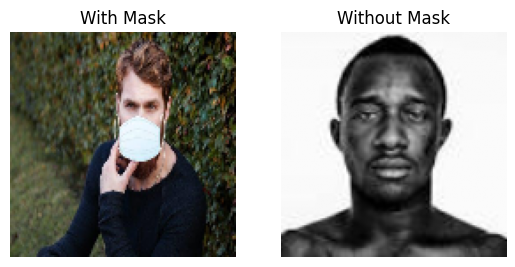

In [60]:
with_mask_index = np.where(labels == 'with_mask')[0][0]
without_mask_index = np.where(labels == 'without_mask')[0][0]
plt.subplot(1, 2, 1)
plt.imshow(images[with_mask_index])
plt.title('With Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[without_mask_index])
plt.title('Without Mask')
plt.axis('off')

plt.show()

In [64]:
print(np.unique(labels))

['with_mask' 'without_mask']


In [65]:
encoder = LabelEncoder()

In [66]:
labels = encoder.fit_transform(labels)

In [70]:
encoder.classes_

array(['with_mask', 'without_mask'], dtype='<U12')

In [71]:
print(np.unique(labels))

[0 1]


In [73]:
features_train, features_test, target_train, target_test = train_test_split(images, labels, test_size=0.2, random_state=2)
print(images.shape, features_train.shape, features_test.shape)
print(labels.shape, target_train.shape, target_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [74]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [75]:
num_of_classes = 2

In [90]:
model = keras.Sequential([
    keras.layers.Input(shape=(128, 128, 3)),
    
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_of_classes, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [92]:
history = model.fit(
    features_train,
    target_train,
    validation_split=0.1,
    epochs=5,
    batch_size=32
)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 136ms/step - accuracy: 0.7859 - loss: 0.5175 - val_accuracy: 0.8959 - val_loss: 0.2668
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.8816 - loss: 0.3009 - val_accuracy: 0.8992 - val_loss: 0.2261
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.8994 - loss: 0.2680 - val_accuracy: 0.9140 - val_loss: 0.2033
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.9104 - loss: 0.2309 - val_accuracy: 0.9240 - val_loss: 0.2036
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9277 - loss: 0.1851 - val_accuracy: 0.9273 - val_loss: 0.2222


In [93]:
training_loss, training_accuracy = model.evaluate(features_train, target_train)
print(f'Accuracy on training data is {training_accuracy * 100 :.2f} %')

189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9517 - loss: 0.1312
Accuracy on training data is 95.17 %


In [94]:
testing_loss, testing_accuracy = model.evaluate(features_test, target_test)
print(f'Accuracy on testing data is {testing_accuracy * 100 :.2f} %')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9305 - loss: 0.1990
Accuracy on testing data is 93.05 %


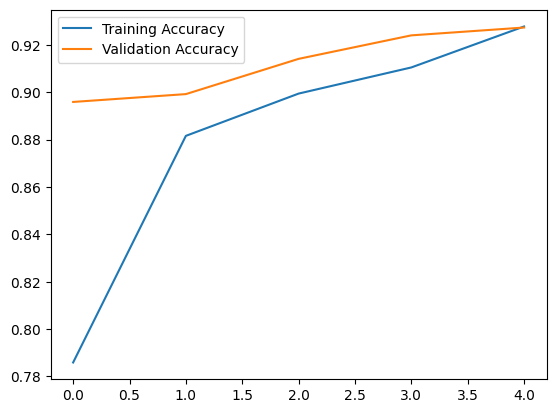

In [101]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [115]:
input_image_path = 'E:/JupyNote/DL Tutorial/Face Mask Detection/data/without_mask/without_mask_56.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print(f'Invalid image.')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (128,128))
input_image = np.asarray(input_image)
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)
prediction = model.predict(input_image)
if np.argmax(prediction) == 0:
    print('The preson has a mask.')
else:
    print('The person doesn\'t have a mask.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The person doesn't have a mask.
